# Trade Markets Analytics

# 1.Introduction

select * from users;


select * from trades;


select count(*) from users;

select count(*) from trades where login_hash in (select login_hash from users);


select count(*) from trades;-- where login_hash in (select login_hash from users);
select count(*) from trades t inner join users u on t.login_hash = u.login_hash; -- where login_hash in (select login_hash from users);



In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [324]:
users = pd.read_csv('/content/Users.csv')
trades = pd.read_csv('/content/Trades.csv')

# 1.1 Users

In [325]:
users.shape

(1000, 5)

In [326]:
users.head(3)

,login_hash,server_hash,country_hash,currency,enable
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


In [327]:
users['server_hash'].unique()

array(['76791A893BDB9A68E8EE44898D581A60',
       '3D1F7E00251C43107EF39F55300781DB',
       '54203B42716FE7C40138AE6C4913EBBC'], dtype=object)

In [328]:
users['server_hash'] = users['server_hash'].map({'76791A893BDB9A68E8EE44898D581A60':'S1','3D1F7E00251C43107EF39F55300781DB':'S2','54203B42716FE7C40138AE6C4913EBBC':'S3'})

In [329]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   login_hash    1000 non-null   object
 1   server_hash   1000 non-null   object
 2   country_hash  1000 non-null   object
 3   currency      1000 non-null   object
 4   enable        1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [330]:
users.isna().sum()

login_hash      0
server_hash     0
country_hash    0
currency        0
enable          0
dtype: int64

In [331]:
servers = users['server_hash'].unique()
print('Number of servers:',len(servers))
country = users['country_hash'].unique()
print('Number of countries:',len(country))

Number of servers: 3
Number of countries: 19


In [332]:
users['enable'].value_counts()

1    973
0     27
Name: enable, dtype: int64

In [333]:
cur = users['currency'].value_counts().to_frame('Count')
cur

,Count
USD,906
AUD,91
NZD,2
EUR,1


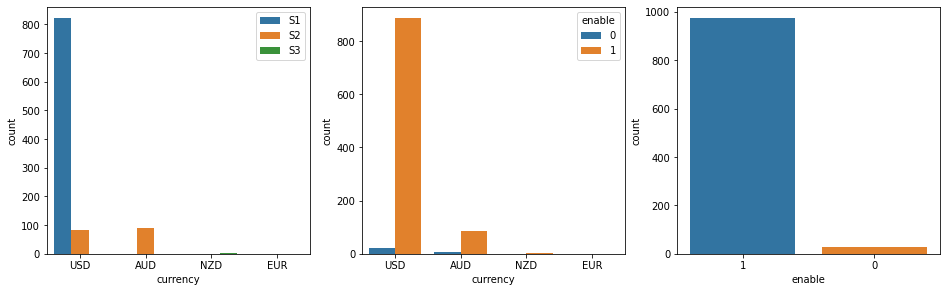

In [334]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index,hue='server_hash')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index,hue='enable')
plt.subplot(2,3,3)
sns.countplot(data = users, x='enable',order=users['enable'].value_counts().index)
plt.show()

Most of the users trading activity is on server S1 with USD and only few users have their accounts disabled.

#1.2 Trades

In [335]:
trades.head(3)

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0


In [336]:
trades['server_hash'].unique()

array(['2F1CA40D76D7E6165DBA3924CE0D3B5C',
       '3D1F7E00251C43107EF39F55300781DB',
       '54203B42716FE7C40138AE6C4913EBBC'], dtype=object)

In [337]:
trades['server_hash'] = trades['server_hash'].map({'2F1CA40D76D7E6165DBA3924CE0D3B5C':'S4','76791A893BDB9A68E8EE44898D581A60':'S1','3D1F7E00251C43107EF39F55300781DB':'S2','54203B42716FE7C40138AE6C4913EBBC':'S3'})

In [338]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   login_hash    100000 non-null  object 
 1   ticket_hash   100000 non-null  object 
 2   server_hash   100000 non-null  object 
 3   symbol        100000 non-null  object 
 4   digits        100000 non-null  int64  
 5   cmd           100000 non-null  int64  
 6   volume        100000 non-null  int64  
 7   open_time     100000 non-null  object 
 8   open_price    100000 non-null  float64
 9   close_time    100000 non-null  object 
 10  contractsize  99993 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


In [339]:
trades.describe()

,digits,cmd,volume,open_price,contractsize
count,100000.000000,100000.000000,100000.000000,100000.000000,99993.000000
mean,3.214250,0.448170,17.986650,1262.544975,44856.840239
std,1.463171,0.497309,100.438786,2585.110285,49669.111281
min,0.000000,0.000000,0.000000,0.591670,1.000000
25%,2.000000,0.000000,1.000000,1.190937,100.000000
50%,2.000000,0.000000,3.000000,1887.590000,100.000000
75%,5.000000,1.000000,10.000000,1967.152500,100000.000000
max,5.000000,1.000000,10000.000000,28795.000000,100000.000000


In [340]:
trades.isna().sum()

login_hash      0
ticket_hash     0
server_hash     0
symbol          0
digits          0
cmd             0
volume          0
open_time       0
open_price      0
close_time      0
contractsize    7
dtype: int64

In [341]:
# Number of contracts with size 100 and 100000 are significantly high and almost equal, we can drop the rows rather than imputation
trades.dropna(axis=0,inplace=True)

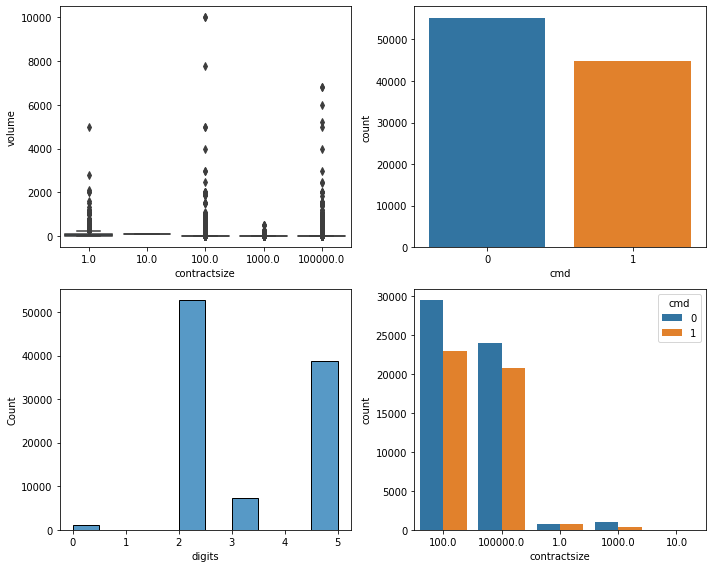

In [342]:
#sns.pairplot(trades)
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(data = trades, x='contractsize',y=trades['volume'])
plt.subplot(2,2,2)
sns.countplot(data = trades, x='cmd',order=trades['cmd'].value_counts().index)
plt.subplot(2,2,3)
sns.histplot(trades['digits'],bins=10)
plt.subplot(2,2,4)
sns.countplot( data = trades, x='contractsize',order=trades['contractsize'].value_counts().index,hue='cmd')
plt.tight_layout()
plt.show()

Most of the contract sizes are of 100 and 10000, buy orders are little high than sell and 2 and 5 digits after decimal on the amount are common. 

In [343]:
cur_pairs = trades.symbol.value_counts().to_frame('Orders')
cur_pairs[cur_pairs['Orders']>1000]

,Orders
XAUUSD,49165
EURUSD,17609
GBPUSD,6723
XTIUSD,2352
EURCHF,1989
USDJPY,1907
GBPJPY,1869
AUDUSD,1803
USDCHF,1592
XAGUSD,1328


XAUUSD and EURUSD are two major currency pairs.

In [344]:
trades['close_time'] = pd.to_datetime(trades['close_time'])
trades['open_time'] = pd.to_datetime(trades['open_time'])

In [345]:
trades['cmd'] = trades['cmd'].astype(np.object)

In [346]:
#trades['time_duration'] = trades['close_time']-trades['open_time']

In [347]:
trades['open_year'] = trades['open_time'].dt.year 
trades['close_year'] = trades['close_time'].dt.year 
trades['open_month'] = trades['open_time'].dt.month 
trades['close_month'] = trades['close_time'].dt.month 
trades['open_day'] = trades['open_time'].dt.day 
trades['close_day'] = trades['close_time'].dt.day 
trades['open_hr'] = trades['open_time'].dt.hour 
trades['close_hr'] = trades['close_time'].dt.hour 
trades['open_min'] = trades['open_time'].dt.minute 
trades['close_min'] = trades['close_time'].dt.minute 
trades['open_sec'] = trades['open_time'].dt.second 
trades['close_sec'] = trades['close_time'].dt.second


trades['open_year'] = trades['open_time'].dt.year
trades['close_year'] = trades['close_time'].dt.year
trades['open_month'] = trades['open_time'].dt.month
trades['close_month'] = trades['close_time'].dt.month
trades['open_day'] = trades['open_time'].dt.day
trades['close_day'] = trades['close_time'].dt.day
trades['open_hr'] = trades['open_time'].dt.hour
trades['close_hr'] = trades['close_time'].dt.hour
trades['open_min'] = trades['open_time'].dt.minute
trades['close_min'] = trades['close_time'].dt.minute
trades['open_sec'] = trades['open_time'].dt.second
trades['close_sec'] = trades['close_time'].dt.second

In [348]:
#trades['close_year'].value_counts()

In [349]:
#trades['time_diff_day'] = trades['time_duration'].values.astype('datetime64[D]')

In [350]:
#trades['time_duration'].values.astype('datetime64[D]')
#trades[['time_duration']].apply(pd.to_numeric)


#trades['time_duration'] = (trades['close_time']-trades['open_time']).dt.day
#trades['time_duration']

In [351]:
#trades['time_diff_day']

In [352]:
df = pd.merge(users, trades, how='inner', on=['login_hash','server_hash'])

In [353]:
df.shape

(36067, 26)

(36067, 27)

In [293]:
df['diff_year'] = df['close_year'] - df['open_year']
df['diff_month'] = df['open_month'] - df['close_month'] 
df['diff_day'] = df['open_day'] - df['close_day']
df['diff_hr'] = df['open_hr'] - df['close_hr']
df['diff_min'] = df['open_min'] - df['close_min']
df['diff_sec'] = df['open_sec'] - df['close_sec']
df['HR_diff'] = df['diff_sec']/3600 + df['diff_min']/60 + df['diff_hr']

In [294]:
df.head()

,login_hash,server_hash_x,country_hash,currency,enable,ticket_hash,server_hash_y,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,open_year,close_year,open_month,close_month,open_day,close_day,open_hr,close_hr,open_min,close_min,open_sec,close_sec,diff_year,diff_month,diff_day,diff_hr,diff_min,diff_sec,HR_diff
0,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,079A2E7D6C17E4F82D0F2215E0F8CBC9,S2,CHFJPY,3,1,1,2020-08-12 15:53:30,117.15000,2020-08-12 15:55:52,100000.0,2020,2020,8,8,12,12,15,15,53,55,30,52,0,0,0,0,-2,-22,-0.039444
1,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9CCEAE55FF215C71E3486890C2908467,S2,AUDNZD,5,0,5,2020-08-31 08:54:34,1.09184,2020-08-31 12:17:38,100000.0,2020,2020,8,8,31,31,8,12,54,17,34,38,0,0,0,-4,37,-4,-3.384444
2,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9AEEAF4DBFD3BC3D0C74E0547A5E63CC,S2,NZDCHF,5,1,2,2020-08-26 16:46:48,0.59741,2020-11-10 11:46:38,100000.0,2020,2020,8,11,26,10,16,11,46,46,48,38,0,-3,16,5,0,10,5.002778
3,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,33419C6F0853738662AD6F2B4634E4FA,S2,AUDNZD,5,1,15,2020-08-07 09:55:24,1.08127,2020-09-18 07:20:12,100000.0,2020,2020,8,9,7,18,9,7,55,20,24,12,0,-1,-11,2,35,12,2.586667
4,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,F59719624F9069434028DC77BD2C27A6,S2,GBPAUD,5,1,1,2020-08-27 15:40:42,1.81941,2020-08-27 16:58:55,100000.0,2020,2020,8,8,27,27,15,16,40,58,42,55,0,0,0,-1,-18,-13,-1.303611


In [295]:
df_train = df.copy()

In [296]:
df_train.isna().sum()

login_hash       0
server_hash_x    0
country_hash     0
currency         0
enable           0
ticket_hash      0
server_hash_y    0
symbol           0
digits           0
cmd              0
volume           0
open_time        0
open_price       0
close_time       0
contractsize     0
open_year        0
close_year       0
open_month       0
close_month      0
open_day         0
close_day        0
open_hr          0
close_hr         0
open_min         0
close_min        0
open_sec         0
close_sec        0
diff_year        0
diff_month       0
diff_day         0
diff_hr          0
diff_min         0
diff_sec         0
HR_diff          0
dtype: int64

Performing labelling to non-int data

In [297]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36067 entries, 0 to 36066
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   login_hash     36067 non-null  object        
 1   server_hash_x  36067 non-null  object        
 2   country_hash   36067 non-null  object        
 3   currency       36067 non-null  object        
 4   enable         36067 non-null  int64         
 5   ticket_hash    36067 non-null  object        
 6   server_hash_y  36067 non-null  object        
 7   symbol         36067 non-null  object        
 8   digits         36067 non-null  int64         
 9   cmd            36067 non-null  object        
 10  volume         36067 non-null  int64         
 11  open_time      36067 non-null  datetime64[ns]
 12  open_price     36067 non-null  float64       
 13  close_time     36067 non-null  datetime64[ns]
 14  contractsize   36067 non-null  float64       
 15  open_year      3606

In [298]:
df['server_hash_x'].value_counts()

S2    35960
S3      107
Name: server_hash_x, dtype: int64

In [299]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [300]:
df_ser = pd.get_dummies(df['server_hash_x'], drop_first=True)
df_cur = pd.get_dummies(df['country_hash'], drop_first=True)
df_train2 = pd.concat((df_train,df_cur,df_ser), axis=1)

In [301]:
df_train2

,login_hash,server_hash_x,country_hash,currency,enable,ticket_hash,server_hash_y,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,open_year,close_year,open_month,close_month,open_day,close_day,open_hr,close_hr,open_min,close_min,open_sec,close_sec,diff_year,diff_month,diff_day,diff_hr,diff_min,diff_sec,HR_diff,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,S3
0,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,079A2E7D6C17E4F82D0F2215E0F8CBC9,S2,CHFJPY,3,1,1,2020-08-12 15:53:30,117.15000,2020-08-12 15:55:52,100000.0,2020,2020,8,8,12,12,15,15,53,55,30,52,0,0,0,0,-2,-22,-0.039444,0,1,0,0,0,0,0,0,0,0,0,0
1,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9CCEAE55FF215C71E3486890C2908467,S2,AUDNZD,5,0,5,2020-08-31 08:54:34,1.09184,2020-08-31 12:17:38,100000.0,2020,2020,8,8,31,31,8,12,54,17,34,38,0,0,0,-4,37,-4,-3.384444,0,1,0,0,0,0,0,0,0,0,0,0
2,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9AEEAF4DBFD3BC3D0C74E0547A5E63CC,S2,NZDCHF,5,1,2,2020-08-26 16:46:48,0.59741,2020-11-10 11:46:38,100000.0,2020,2020,8,11,26,10,16,11,46,46,48,38,0,-3,16,5,0,10,5.002778,0,1,0,0,0,0,0,0,0,0,0,0
3,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,33419C6F0853738662AD6F2B4634E4FA,S2,AUDNZD,5,1,15,2020-08-07 09:55:24,1.08127,2020-09-18 07:20:12,100000.0,2020,2020,8,9,7,18,9,7,55,20,24,12,0,-1,-11,2,35,12,2.586667,0,1,0,0,0,0,0,0,0,0,0,0
4,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,F59719624F9069434028DC77BD2C27A6,S2,GBPAUD,5,1,1,2020-08-27 15:40:42,1.81941,2020-08-27 16:58:55,100000.0,2020,2020,8,8,27,27,15,16,40,58,42,55,0,0,0,-1,-18,-13,-1.303611,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36062,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,D34F969A21F0960EA66D82E8E7085895,S2,GBPUSD,5,1,5,2020-08-28 07:31:52,1.32400,2020-08-28 07:40:59,100000.0,2020,2020,8,8,28,28,7,7,31,40,52,59,0,0,0,0,-9,-7,-0.151944,0,1,0,0,0,0,0,0,0,0,0,0
36063,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,8A76E6507E13A0C1ADA76D65BDC8286C,S2,XAUUSD,2,0,1,2020-08-28 13:02:54,1956.86000,2020-08-28 13:05:28,100.0,2020,2020,8,8,28,28,13,13,2,5,54,28,0,0,0,0,-3,26,-0.042778,0,1,0,0,0,0,0,0,0,0,0,0
36064,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,10A5AFDAC6EF6DD6440025DBBFCC8225,S2,XAUUSD,2,0,1,2020-08-28 03:18:34,1926.99000,2020-08-28 03:19:21,100.0,2020,2020,8,8,28,28,3,3,18,19,34,21,0,0,0,0,-1,13,-0.013056,0,1,0,0,0,0,0,0,0,0,0,0
36065,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,650DC22D9210101A4ED7DFF8FC0DF81D,S2,XAUUSD,2,1,2,2020-08-28 05:10:24,1936.33000,2020-08-28 05:10:58,100.0,2020,2020,8,8,28,28,5,5,10,10,24,58,0,0,0,0,0,-34,-0.009444,0,1,0,0,0,0,0,0,0,0,0,0


In [302]:
df_train2.columns

Index(['login_hash', 'server_hash_x', 'country_hash', 'currency', 'enable',
       'ticket_hash', 'server_hash_y', 'symbol', 'digits', 'cmd', 'volume',
       'open_time', 'open_price', 'close_time', 'contractsize', 'open_year',
       'close_year', 'open_month', 'close_month', 'open_day', 'close_day',
       'open_hr', 'close_hr', 'open_min', 'close_min', 'open_sec', 'close_sec',
       'diff_year', 'diff_month', 'diff_day', 'diff_hr', 'diff_min',
       'diff_sec', 'HR_diff', '221CDFB73049678E244380B45872CBB2',
       '4442E4AF0916F53A07FB8CA9A49B98ED', '4A2581E346483DA488A11C4B2D2DE97E',
       '551FE18EF47D4E6E9D943B9A68ADA21D', '77DAB2F81A6C8C9136EFBA7AB2C4C0F2',
       '89F9C9F489BE2A83CF57E53B9197D288', '907EBA32D950BFAB68227FD7EA22999B',
       'A67D4CBDD1B59E0FFCCC6BAFC83EB033', 'A8F809C99C4A996780C3046B9B594195',
       'AE54A5C026F31ADA088992587D92CB3A', 'C51ED580EA5E20C910D951F692512B4D',
       'S3'],
      dtype='object')

In [303]:
cols_drop = ['login_hash','country_hash','server_hash_x','server_hash_y','open_time','close_time','open_hr',
       'close_hr', 'open_min', 'close_min', 'open_sec', 'close_sec']#,'time_duration']

In [304]:
df_login_hash = df_train2['login_hash']
df_train2.drop(labels=cols_drop,axis=1,inplace=True)

In [305]:
obj_cols = df_train2.select_dtypes(np.object).columns.to_list()
obj_cols = 

['currency', 'ticket_hash', 'symbol', 'cmd']

In [306]:
le = LabelEncoder()
for col in obj_cols:
  df_train2[col] = le.fit_transform(df_train2[col])

In [307]:
df_train2.head(3)

,currency,enable,ticket_hash,symbol,digits,cmd,volume,open_price,contractsize,open_year,close_year,open_month,close_month,open_day,close_day,diff_year,diff_month,diff_day,diff_hr,diff_min,diff_sec,HR_diff,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,S3
0,0,1,284,10,3,1,1,117.15000,100000.0,2020,2020,8,8,12,12,0,0,0,0,-2,-22,-0.039444,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,4880,3,5,0,5,1.09184,100000.0,2020,2020,8,8,31,31,0,0,0,-4,37,-4,-3.384444,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,4825,28,5,1,2,0.59741,100000.0,2020,2020,8,11,26,10,0,-3,16,5,0,10,5.002778,0,1,0,0,0,0,0,0,0,0,0,0


In [308]:
sc = StandardScaler()

df_scaled = sc.fit_transform(df_train2)

In [309]:
df = pd.DataFrame(df_scaled)
df.columns = df_train2.columns
df.head(2)

,currency,enable,ticket_hash,symbol,digits,cmd,volume,open_price,contractsize,open_year,close_year,open_month,close_month,open_day,close_day,diff_year,diff_month,diff_day,diff_hr,diff_min,diff_sec,HR_diff,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,S3
0,-1.875288,0.189635,-1.636807,-1.091957,-1.253201,1.050487,-0.165768,-0.199576,0.460224,0.0,-0.196739,0.0,-0.070859,-0.507350,-0.502584,-0.196739,0.070859,-0.019487,0.080328,-0.076677,-0.841302,0.070492,-0.010532,0.28103,-0.073729,-0.14383,-0.032901,-0.199761,-0.040821,-0.025804,-0.041497,-0.047149,-0.035345,-0.054548
1,-1.875288,0.189635,0.375591,-1.761878,0.474663,-0.951940,-0.060846,-0.284855,0.460224,0.0,-0.196739,0.0,-0.070859,1.668259,1.671897,-0.196739,0.070859,-0.019487,-1.068661,1.639154,-0.103246,-0.892330,-0.010532,0.28103,-0.073729,-0.14383,-0.032901,-0.199761,-0.040821,-0.025804,-0.041497,-0.047149,-0.035345,-0.054548


#3.Modelling

In [310]:
df.columns

Index(['currency', 'enable', 'ticket_hash', 'symbol', 'digits', 'cmd',
       'volume', 'open_price', 'contractsize', 'open_year', 'close_year',
       'open_month', 'close_month', 'open_day', 'close_day', 'diff_year',
       'diff_month', 'diff_day', 'diff_hr', 'diff_min', 'diff_sec', 'HR_diff',
       '221CDFB73049678E244380B45872CBB2', '4442E4AF0916F53A07FB8CA9A49B98ED',
       '4A2581E346483DA488A11C4B2D2DE97E', '551FE18EF47D4E6E9D943B9A68ADA21D',
       '77DAB2F81A6C8C9136EFBA7AB2C4C0F2', '89F9C9F489BE2A83CF57E53B9197D288',
       '907EBA32D950BFAB68227FD7EA22999B', 'A67D4CBDD1B59E0FFCCC6BAFC83EB033',
       'A8F809C99C4A996780C3046B9B594195', 'AE54A5C026F31ADA088992587D92CB3A',
       'C51ED580EA5E20C910D951F692512B4D', 'S3'],
      dtype='object')

In [311]:
"""df_t = df[['currency', 'enable', 'symbol', 'digits', 'cmd',
       'volume', 'open_price', 'contractsize'
       , 'open_year', 'close_year',
       'open_month', 'close_month', 'open_day', 'close_day', 'open_hr',
       'close_hr', 'open_min', 'close_min', 'open_sec', 'close_sec']]"""

"df_t = df[['currency', 'enable', 'symbol', 'digits', 'cmd',\n       'volume', 'open_price', 'contractsize'\n       , 'open_year', 'close_year',\n       'open_month', 'close_month', 'open_day', 'close_day', 'open_hr',\n       'close_hr', 'open_min', 'close_min', 'open_sec', 'close_sec']]"

In [312]:
from sklearn.cluster import KMeans

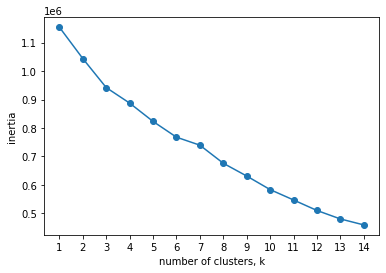

In [313]:
#km = KMeans(n_clusters=10)

ks = range(1,15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [314]:
model=KMeans(n_clusters=4)
# Fitting model
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [315]:
df['Cluster'] = model.labels_

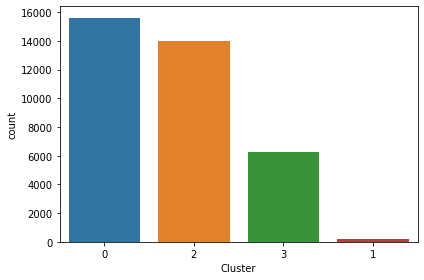

In [316]:
plt.figure(figsize=(6,4))
sns.countplot(df['Cluster'],order=df['Cluster'].value_counts().index)
plt.tight_layout()
plt.show()

Performing PCA to find out three principal components

In [317]:
from sklearn.decomposition import PCA

In [318]:
# Create a PCA model with 3 components: pca
pca = PCA(n_components=20)

# Fit the PCA instance to the scaled samples
pca.fit(df)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df)

# Print the shape of pca_features
print(pca_features.shape)

(36067, 20)


In [319]:
pca.explained_variance_

array([4.23001393, 2.92805282, 2.28395731, 2.1733461 , 2.03757773,
       1.99190118, 1.81771316, 1.36441003, 1.09196362, 1.07287455,
       1.05500226, 1.01500162, 1.01185404, 1.00317313, 1.00083335,
       0.99797912, 0.98593021, 0.96272917, 0.94941932, 0.91787918])

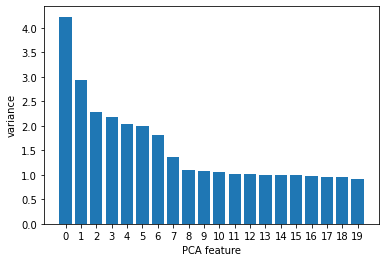

In [320]:
features = range(0,pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [321]:
import plotly.express as px

In [322]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Cluster'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()